In [ ]:
from google.colab import drive 
import os 
import zipfile 

drive.mount('/content/drive')
path = "/content/drive/My Drive/Copy of img_align_celeba.zip" 
target_dir = './celebra/' 
# Unzip file to the target dir
with zipfile.ZipFile(path, 'r') as foo:
    print('Extraction started')
    foo.extractall(target_dir)
print('Done')

# Extracted file
extracted_file_path = '/content/celebra/img_align_celeba'
file_paths = []
for root, dirs, files in os.walk(extracted_file_path):
    for file_ in files:
        file_paths.append(f'{extracted_file_path}/{file_}')


In [ ]:
!mkdir gray
!ls

celebra  drive	gray  sample_data


In [ ]:
# Make resized path filenames for saving processed data
resized_paths = [f'./gray/celeb_160_gray_{path[-10:]}' for path in file_paths]
resized_paths.sort()
print(resized_paths[:100])

['./gray/celeb_160_gray_000001.jpg', './gray/celeb_160_gray_000002.jpg', './gray/celeb_160_gray_000003.jpg', './gray/celeb_160_gray_000004.jpg', './gray/celeb_160_gray_000005.jpg', './gray/celeb_160_gray_000006.jpg', './gray/celeb_160_gray_000007.jpg', './gray/celeb_160_gray_000008.jpg', './gray/celeb_160_gray_000009.jpg', './gray/celeb_160_gray_000010.jpg', './gray/celeb_160_gray_000011.jpg', './gray/celeb_160_gray_000012.jpg', './gray/celeb_160_gray_000013.jpg', './gray/celeb_160_gray_000014.jpg', './gray/celeb_160_gray_000015.jpg', './gray/celeb_160_gray_000016.jpg', './gray/celeb_160_gray_000017.jpg', './gray/celeb_160_gray_000018.jpg', './gray/celeb_160_gray_000019.jpg', './gray/celeb_160_gray_000020.jpg', './gray/celeb_160_gray_000021.jpg', './gray/celeb_160_gray_000022.jpg', './gray/celeb_160_gray_000023.jpg', './gray/celeb_160_gray_000024.jpg', './gray/celeb_160_gray_000025.jpg', './gray/celeb_160_gray_000026.jpg', './gray/celeb_160_gray_000027.jpg', './gray/celeb_160_gray_0000

In [ ]:
# Crop and resize and write to the machine
from tqdm.notebook import tqdm
import cv2
import numpy as np 

file_paths.sort()
count=0
for path in tqdm(file_paths):
    img = cv2.imread(path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # Grayscale
    rgb = np.asarray(gray)
    rgb = rgb[20:(218-20), 0:178]
    resized = cv2.resize(rgb, (160, 160))
    cv2.imwrite(resized_paths[count], resized)
    count+=1

(160, 160)


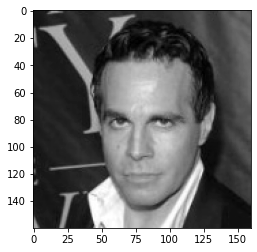

In [ ]:
for roots, dirs, files in os.walk(f'./gray'):
    resized_paths = []
    for file_ in files:
        resized_paths.append(f'./gray/{file_}')
resized_paths.sort()
import matplotlib.pyplot as plt 
img = cv2.imread(resized_paths[7], 0)
print(img.shape)
plt.imshow(1- img/255, cmap = 'binary')
plt.show()

In [ ]:
from zipfile import ZipFile
# zip the preprocessed images into a zip file 
zip_name = f'./CELEB_160_gray.zip'
with ZipFile(zip_name, 'w') as zipper:
    print(f'Zipping started')
    for path in tqdm(resized_paths):
        zipper.write(path)
print('Done')

Zipping started



Done


In [ ]:
!ls

CELEB_160_gray.zip  celebra  drive  gray  sample_data


In [ ]:
# Copy/Move the zip file to you drive for training.
!cp /content/CELEB_160_gray.zip /content/drive/'My Drive'/
print('Moved')

Moved
